In [1]:
import numpy as np
import matplotlib.pyplot as plt

# You may change the mhealth_activity module but your algorithm must support the original version
from mhealth_activity import Recording, Trace, Activity, WatchLocation, Path

# For interactive plots, uncomment the following line
%matplotlib widget

In [2]:
import os
import pandas as pd

files = os.listdir('data/train')
list_of_dfs = []
"""
for file in files:
    d = Recording(os.path.join('data/train',file))
    list_of_dfs.append(d)

data = pd.DataFrame(list_of_dfs)
"""

"\nfor file in files:\n    d = Recording(os.path.join('data/train',file))\n    list_of_dfs.append(d)\n\ndata = pd.DataFrame(list_of_dfs)\n"

In [3]:
#data.to_pickle('train_data.pkl')

In [4]:
# Load the DataFrame from the pickle file
""" data = pd.read_pickle('train_data.pkl') """

" data = pd.read_pickle('train_data.pkl') "

In [5]:
""" data.columns = ["recording"] """

' data.columns = ["recording"] '

In [6]:
""" christophs_fussy_mess = []
for sample in data["recording"]:
    try:
        phone_steps = sample.data["phone_steps"]
    except KeyError:
        phone_steps = None
    christophs_fussy_mess.extend([[sample.labels["path_idx"],sample.labels["activities"],
                                   sample.data["longitude"],sample.data["latitude"],
                                   sample.data["speed"],sample.data["altitude"], sample.labels["step_count"], phone_steps]]) """

' christophs_fussy_mess = []\nfor sample in data["recording"]:\n    try:\n        phone_steps = sample.data["phone_steps"]\n    except KeyError:\n        phone_steps = None\n    christophs_fussy_mess.extend([[sample.labels["path_idx"],sample.labels["activities"],\n                                   sample.data["longitude"],sample.data["latitude"],\n                                   sample.data["speed"],sample.data["altitude"], sample.labels["step_count"], phone_steps]]) '

In [7]:
""" christophs_fussy_mess = pd.DataFrame(christophs_fussy_mess) """

' christophs_fussy_mess = pd.DataFrame(christophs_fussy_mess) '

In [8]:
""" christophs_fussy_mess.columns = ["path_idx","activities","longitude","latitude","speed","altitude", "step_count", "phone_steps"] """

' christophs_fussy_mess.columns = ["path_idx","activities","longitude","latitude","speed","altitude", "step_count", "phone_steps"] '

In [9]:
""" christophs_fussy_mess.to_pickle('activitylabelcreation_data.pkl')
 """
christophs_fussy_mess = pd.read_pickle('activitylabelcreation_data.pkl')

In [10]:
christophs_fussy_mess

,path_idx,activities,longitude,latitude,speed,altitude,step_count,phone_steps
0,2,[1],"Trace(title='longitude', total_time=584.87, sa...","Trace(title='latitude', total_time=584.87, sam...","Trace(title='speed', total_time=584.87, sample...","Trace(title='altitude', total_time=584.87, sam...",NaN,"Trace(title='phone_steps', total_time=584.87, ..."
1,0,"[1, 2]","Trace(title='longitude', total_time=519.01, sa...","Trace(title='latitude', total_time=519.01, sam...","Trace(title='speed', total_time=519.01, sample...","Trace(title='altitude', total_time=519.01, sam...",NaN,"Trace(title='phone_steps', total_time=519.01, ..."
2,0,"[0, 1, 2]","Trace(title='longitude', total_time=594.12, sa...","Trace(title='latitude', total_time=594.12, sam...","Trace(title='speed', total_time=594.12, sample...","Trace(title='altitude', total_time=594.12, sam...",NaN,None
3,2,[1],"Trace(title='longitude', total_time=519.63, sa...","Trace(title='latitude', total_time=519.63, sam...","Trace(title='speed', total_time=519.63, sample...","Trace(title='altitude', total_time=519.63, sam...",NaN,None
4,1,[1],"Trace(title='longitude', total_time=625.44, sa...","Trace(title='latitude', total_time=625.44, sam...","Trace(title='speed', total_time=625.44, sample...","Trace(title='altitude', total_time=625.44, sam...",NaN,None
...,...,...,...,...,...,...,...,...
391,3,"[0, 1, 2]","Trace(title='longitude', total_time=325.70, sa...","Trace(title='latitude', total_time=325.70, sam...","Trace(title='speed', total_time=325.70, sample...","Trace(title='altitude', total_time=325.70, sam...",NaN,"Trace(title='phone_steps', total_time=325.70, ..."
392,4,[1],"Trace(title='longitude', total_time=619.13, sa...","Trace(title='latitude', total_time=619.13, sam...","Trace(title='speed', total_time=619.13, sample...","Trace(title='altitude', total_time=619.13, sam...",NaN,"Trace(title='phone_steps', total_time=619.13, ..."
393,2,[1],"Trace(title='longitude', total_time=747.65, sa...","Trace(title='latitude', total_time=747.65, sam...","Trace(title='speed', total_time=747.65, sample...","Trace(title='altitude', total_time=747.65, sam...",NaN,None
394,3,[1],"Trace(title='longitude', total_time=456.01, sa...","Trace(title='latitude', total_time=456.01, sam...","Trace(title='speed', total_time=456.01, sample...","Trace(title='altitude', total_time=456.01, sam...",NaN,None


In [11]:
phone_steps = christophs_fussy_mess['phone_steps'][0]

print(" Time           x-Steps")

for t,x in list(zip(phone_steps.timestamps, phone_steps.values))[::8]: #ich extrahiere nur jedes 8te, das sind circa 3 timestampts für jede 2 sekunden; eventuell ist das aber noch immer viel zu viel weil es immer noch replikas gibt wenn es um die 
    print(f"{t: .3f}s \t{x:.5f} steps?")


 Time           x-Steps
 0.000s 	0.00000 steps?
 0.639s 	0.00000 steps?
 1.278s 	3.00000 steps?
 1.917s 	3.00000 steps?
 2.556s 	3.00000 steps?
 3.196s 	3.00000 steps?
 3.835s 	7.00000 steps?
 4.474s 	7.00000 steps?
 5.113s 	7.00000 steps?
 5.752s 	7.00000 steps?
 6.391s 	12.00000 steps?
 7.030s 	12.00000 steps?
 7.669s 	12.00000 steps?
 8.309s 	12.00000 steps?
 8.948s 	17.00000 steps?
 9.587s 	17.00000 steps?
 10.226s 	17.00000 steps?
 10.865s 	17.00000 steps?
 11.504s 	20.00000 steps?
 12.143s 	20.00000 steps?
 12.782s 	20.00000 steps?
 13.422s 	20.00000 steps?
 14.061s 	26.00000 steps?
 14.700s 	26.00000 steps?
 15.339s 	26.00000 steps?
 15.978s 	26.00000 steps?
 16.617s 	31.00000 steps?
 17.256s 	31.00000 steps?
 17.895s 	31.00000 steps?
 18.534s 	31.00000 steps?
 19.174s 	36.00000 steps?
 19.813s 	36.00000 steps?
 20.452s 	36.00000 steps?
 21.091s 	36.00000 steps?
 21.730s 	41.00000 steps?
 22.369s 	41.00000 steps?
 23.008s 	41.00000 steps?
 23.647s 	41.00000 steps?
 24.287s 	46.0

In [12]:
""" phone_steps = christophs_fussy_mess['phone_steps'][0]

print(" Time           Steps")

# Initialize a dictionary to store steps for each second
steps_per_second = {}

# Iterate over the timestamps and values
for t, x in zip(phone_steps.timestamps, phone_steps.values):
    # Get the second part of the timestamp as the key
    second = int(t)
    #print("second:", second, "real: ", t)
    # If the second is not in the dictionary, initialize it with an empty list
    if second not in steps_per_second:
        steps_per_second[second] = []
    # Add the steps to the list for the current second
    steps_per_second[second].append(x)

# Calculate the average steps for each second
for second, steps in steps_per_second.items():
    average_steps = sum(steps) / len(steps)
    print(f"{second}s \t{average_steps:.5f} steps") """
#das pooled alles in eine sekunde jeweils, eine überlegung wert

' phone_steps = christophs_fussy_mess[\'phone_steps\'][0]\n\nprint(" Time           Steps")\n\n# Initialize a dictionary to store steps for each second\nsteps_per_second = {}\n\n# Iterate over the timestamps and values\nfor t, x in zip(phone_steps.timestamps, phone_steps.values):\n    # Get the second part of the timestamp as the key\n    second = int(t)\n    #print("second:", second, "real: ", t)\n    # If the second is not in the dictionary, initialize it with an empty list\n    if second not in steps_per_second:\n        steps_per_second[second] = []\n    # Add the steps to the list for the current second\n    steps_per_second[second].append(x)\n\n# Calculate the average steps for each second\nfor second, steps in steps_per_second.items():\n    average_steps = sum(steps) / len(steps)\n    print(f"{second}s \t{average_steps:.5f} steps") '

In [13]:
#get unique activities

import pandas as pd

def check_unique_activities(row):
    unique_activities = set(row['activities'])
    #print(unique_activities)
    return unique_activities.issubset({3}) and len(unique_activities) == 1

# Apply the function to each row of the DataFrame
indices = christophs_fussy_mess[christophs_fussy_mess.apply(check_unique_activities, axis=1)].index

# Print the indices of the rows that meet the condition
print(indices)


Index([27, 46, 82, 114, 154, 155, 179, 184, 238, 287, 288, 298, 315, 329, 361], dtype='int64')


In [14]:
unique_activity_df = christophs_fussy_mess.loc[indices]
unique_activity_df.to_pickle('unique_activity_THREE.pkl')
#unique_activity_df = pd.read_pickle('unique_activity_df.pkl')

In [15]:
unique_activity_df

,path_idx,activities,longitude,latitude,speed,altitude,step_count,phone_steps
27,0,[3],"Trace(title='longitude', total_time=249.13, sa...","Trace(title='latitude', total_time=249.13, sam...","Trace(title='speed', total_time=249.13, sample...","Trace(title='altitude', total_time=249.13, sam...",NaN,"Trace(title='phone_steps', total_time=249.13, ..."
46,0,[3],"Trace(title='longitude', total_time=345.38, sa...","Trace(title='latitude', total_time=345.38, sam...","Trace(title='speed', total_time=345.38, sample...","Trace(title='altitude', total_time=345.38, sam...",0.0,None
82,0,[3],"Trace(title='longitude', total_time=356.85, sa...","Trace(title='latitude', total_time=356.85, sam...","Trace(title='speed', total_time=356.85, sample...","Trace(title='altitude', total_time=356.85, sam...",0.0,None
114,3,[3],"Trace(title='longitude', total_time=187.97, sa...","Trace(title='latitude', total_time=187.97, sam...","Trace(title='speed', total_time=187.97, sample...","Trace(title='altitude', total_time=187.97, sam...",NaN,None
154,0,[3],"Trace(title='longitude', total_time=373.50, sa...","Trace(title='latitude', total_time=373.50, sam...","Trace(title='speed', total_time=373.50, sample...","Trace(title='altitude', total_time=373.50, sam...",NaN,None
155,1,[3],"Trace(title='longitude', total_time=259.65, sa...","Trace(title='latitude', total_time=259.65, sam...","Trace(title='speed', total_time=259.65, sample...","Trace(title='altitude', total_time=259.65, sam...",NaN,None
179,0,[3],"Trace(title='longitude', total_time=186.34, sa...","Trace(title='latitude', total_time=186.34, sam...","Trace(title='speed', total_time=186.34, sample...","Trace(title='altitude', total_time=186.34, sam...",NaN,None
184,0,[3],"Trace(title='longitude', total_time=323.34, sa...","Trace(title='latitude', total_time=323.34, sam...","Trace(title='speed', total_time=323.34, sample...","Trace(title='altitude', total_time=323.34, sam...",0.0,"Trace(title='phone_steps', total_time=323.34, ..."
238,0,[3],"Trace(title='longitude', total_time=258.12, sa...","Trace(title='latitude', total_time=258.12, sam...","Trace(title='speed', total_time=258.12, sample...","Trace(title='altitude', total_time=258.12, sam...",NaN,"Trace(title='phone_steps', total_time=258.12, ..."
287,0,[3],"Trace(title='longitude', total_time=205.29, sa...","Trace(title='latitude', total_time=205.29, sam...","Trace(title='speed', total_time=205.29, sample...","Trace(title='altitude', total_time=205.29, sam...",NaN,None


In [16]:
print(unique_activity_df.loc[162]["phone_steps"].values)
print(unique_activity_df.loc[162]["phone_steps"].timestamps)

KeyError: 162

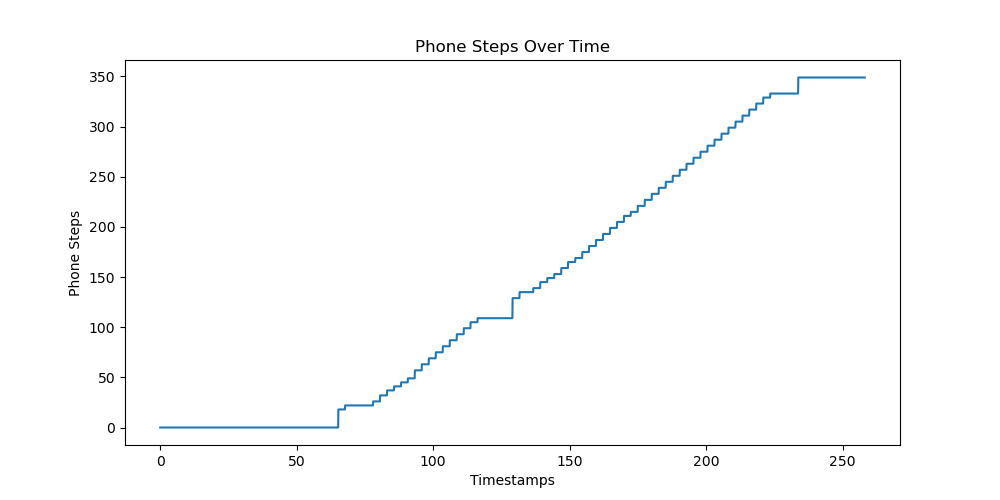

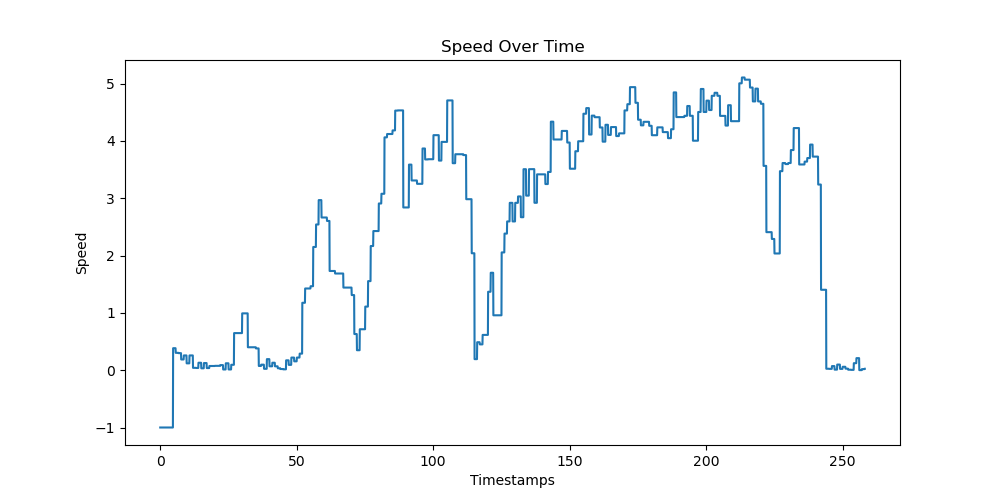

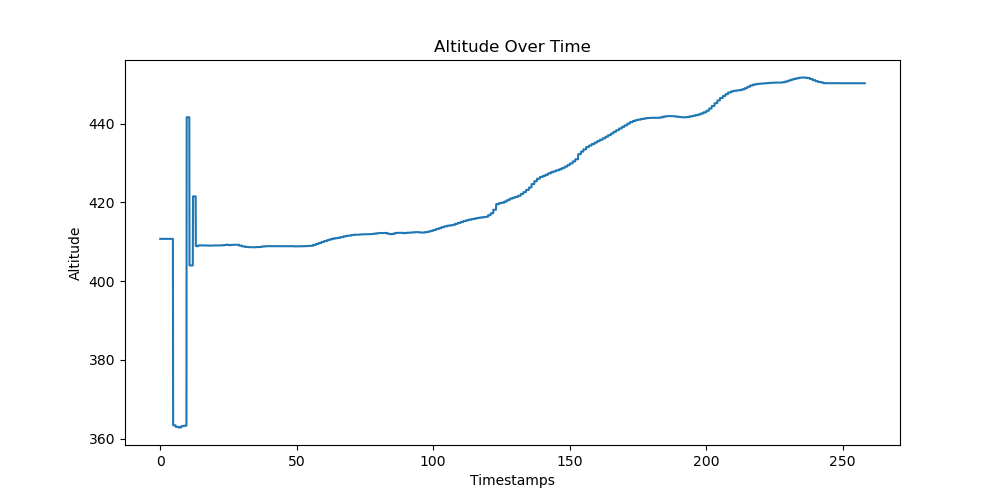

In [ ]:
#unique_activity_df.loc[21]["speed"]

index = 238

phone_steps_values = unique_activity_df.loc[index]["phone_steps"].values
phone_steps_timestamps = unique_activity_df.loc[index]["phone_steps"].timestamps
speed_values = unique_activity_df.loc[index]["speed"].values
speed_timestamps = unique_activity_df.loc[index]["speed"].timestamps

# Create the first plot for phone_steps
plt.figure(figsize=(10, 5))  # Optional: specify figure size
plt.plot(phone_steps_timestamps, phone_steps_values)
plt.xlabel('Timestamps')
plt.ylabel('Phone Steps')
plt.title('Phone Steps Over Time')
plt.show()

# Create the second plot for speed
plt.figure(figsize=(10, 5))  # Optional: specify figure size
plt.plot(speed_timestamps, speed_values)
plt.xlabel('Timestamps')
plt.ylabel('Speed')
plt.title('Speed Over Time')
plt.show()

speed_values = unique_activity_df.loc[index]["altitude"].values
speed_timestamps = unique_activity_df.loc[index]["altitude"].timestamps

plt.figure(figsize=(10, 5))  # Optional: specify figure size
plt.plot(speed_timestamps, speed_values)
plt.xlabel('Timestamps')
plt.ylabel('Altitude')
plt.title('Altitude Over Time')
plt.show()

In [ ]:
phone_steps = unique_activity_df.loc[index]["phone_steps"]

print(" Time           Steps")

# Initialize a dictionary to store steps for each second
steps_per_second = {}


# Iterate over the timestamps and values
for t, x in zip(phone_steps.timestamps, phone_steps.values):
    # Get the second part of the timestamp as the key
    second = int(t)
    #print("second:", second, "real: ", t)
    # If the second is not in the dictionary, initialize it with an empty list
    if second not in steps_per_second:
        steps_per_second[second] = []
    # Add the steps to the list for the current second
    steps_per_second[second].append(x)

# Calculate the average steps for each second
for second, steps in steps_per_second.items():
    average_steps = sum(steps) / len(steps)
    print(f"{second}s \t{average_steps:.5f} steps")
#das pooled alles in eine sekunde jeweils, eine überlegung wert

 Time           Steps
0s 	0.00000 steps
1s 	0.00000 steps
2s 	0.00000 steps
3s 	0.00000 steps
4s 	0.00000 steps
5s 	0.00000 steps
6s 	0.00000 steps
7s 	0.00000 steps
8s 	0.00000 steps
9s 	0.00000 steps
10s 	0.00000 steps
11s 	0.00000 steps
12s 	0.00000 steps
13s 	0.00000 steps
14s 	0.00000 steps
15s 	0.00000 steps
16s 	0.00000 steps
17s 	0.00000 steps
18s 	0.00000 steps
19s 	0.00000 steps
20s 	0.00000 steps
21s 	0.00000 steps
22s 	0.00000 steps
23s 	0.00000 steps
24s 	0.00000 steps
25s 	0.00000 steps
26s 	0.00000 steps
27s 	0.00000 steps
28s 	0.00000 steps
29s 	0.00000 steps
30s 	0.00000 steps
31s 	0.00000 steps
32s 	0.00000 steps
33s 	0.00000 steps
34s 	0.00000 steps
35s 	0.00000 steps
36s 	0.00000 steps
37s 	0.00000 steps
38s 	0.00000 steps
39s 	0.00000 steps
40s 	0.00000 steps
41s 	0.00000 steps
42s 	0.00000 steps
43s 	0.00000 steps
44s 	0.00000 steps
45s 	0.00000 steps
46s 	0.00000 steps
47s 	0.00000 steps
48s 	0.00000 steps
49s 	0.00000 steps
50s 	0.00000 steps
51s 	0.00000 steps


[]